<a href="https://www.kaggle.com/code/daffaarifadilla/satisfaction-analysis?scriptVersionId=162413191" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **EMPLOYEES SATISFACTION ANALYSIS**

## Question : 
1) View the data and obtain statistical summaries. Ensure data types are appropriate and 
there is no missing data. Determine the outcome and input variables. <br>
2) Use the whisker boxplot to determine whether there is an outlier in the data. <br>
3) Use the appropriate diagram to demonstrate the categorical variable in the data. <br>
4) Explain to your manager what actually leads to differences in income (salary). <br>
5) Determine the relationship among the variables. <br>

lastly, i tried to predicting satisfaction_level using <strong>XGBoost</strong>

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.typing import ArrayLike
from pandas.core.frame import DataFrame, Series
from xgboost import XGBRegressor
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from IPython.display import display, HTML, Markdown

In [2]:
CSS = """
    .output {
    flex-direction: row;
    }
"""

HTML(f"<style>{CSS}</style>")

<h1 id="header-1">1. View the data and obtain statistical summaries. Ensure data types are appropriate and 
there is no missing data. Determine the outcome and input variables.</h1>


In [3]:
df = pd.read_csv('/kaggle/input/employees-satisfaction-analysis/Employee Attrition.csv',\
                dtype={'salary':'category', 'dept':'category'})
df = df.drop('Emp ID', axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


In [4]:
n_rows, n_columns = df.shape 
total_data = n_rows * n_columns
print(f'total rows: {n_rows} \ntotal columns: {n_columns} \ntotal data: {total_data}')

total rows: 15787 
total columns: 9 
total data: 142083


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  float64 
 3   average_montly_hours   14999 non-null  float64 
 4   time_spend_company     14999 non-null  float64 
 5   Work_accident          14999 non-null  float64 
 6   promotion_last_5years  14999 non-null  float64 
 7   dept                   14999 non-null  category
 8   salary                 14999 non-null  category
dtypes: category(2), float64(7)
memory usage: 894.8 KB


In [6]:
df.isnull().sum()

satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64

<p>The table on the left presents the first five rows with 788 missing values in each of the nine columns. This corresponds to 4.99% of the total observations, considering a dataset with 15,787 rows and 9 columns.</p>

<p>\[ \text{Percentage of Missing Data} = \left( \frac{9 \times 788}{142083} \right) \times 100 \approx 4.99\% \]</p>

<p>This indicates that data has approximately \( 4.99\% \) missing data in the entire dataframe.</p>

<p>Since all values in these particular rows are absent, there is no need for imputation. The provided code effectively eliminates these rows to handle the missing values.</p>






In [7]:
# Delete the entire missing values
df.dropna(inplace=True)

In [8]:
def summary_stats(dataframe: DataFrame, numeric_only = True, style=True):
    if numeric_only:
        summary: DataFrame = dataframe.describe().T
        summary["variance"] = dataframe.var(numeric_only=True)
        summary = summary if not style else summary.style.format("{:.2f}").\
        background_gradient(cmap="Blues", axis=1, subset=summary.columns.drop("count"))
    else:
        summary = dataframe.describe(exclude="number")
    return summary



numeric_cols_summary = summary_stats(df, style=True)
category_cols_summary = summary_stats(df, numeric_only=False)

display(numeric_cols_summary)
display(category_cols_summary)

,count,mean,std,min,25%,50%,75%,max,variance
satisfaction_level,14999.00,0.61,0.25,0.09,0.44,0.64,0.82,1.00,0.06
last_evaluation,14999.00,0.72,0.17,0.36,0.56,0.72,0.87,1.00,0.03
number_project,14999.00,3.80,1.23,2.00,3.00,4.00,5.00,7.00,1.52
average_montly_hours,14999.00,201.05,49.94,96.00,156.00,200.00,245.00,310.00,2494.31
time_spend_company,14999.00,3.50,1.46,2.00,3.00,3.00,4.00,10.00,2.13
Work_accident,14999.00,0.14,0.35,0.00,0.00,0.00,0.00,1.00,0.12
promotion_last_5years,14999.00,0.02,0.14,0.00,0.00,0.00,0.00,1.00,0.02


,dept,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


<p><strong>Satisfaction Level Statistic:</strong><br>
The statistical analysis of satisfaction levels provides valuable insights into the overall contentment of employees. The mean satisfaction level of approximately 0.613 suggests a moderately <strong>positive sentiment</strong>, with a standard deviation of around 0.249 indicating some variability around this average. Quartiles reveal that 25% of employees have a satisfaction level below 0.44, while 75% have a level below 0.82. The median satisfaction level, standing at 0.64, reflects a balanced distribution. The range, spanning from 0.09 to 1.0, underscores the diversity of satisfaction levels. The variance, measuring at 0.062, gauges the extent of dispersion in employee satisfaction.</p>

<p><strong>Last Evaluation Statistic:</strong><br>
Examining the last evaluation statistic sheds light on employee performance scores. With an average score of about 0.716 and a standard deviation of 0.171, evaluations generally lean towards positive assessments. Quartiles indicate that 25% of employees have a score below 0.56, while 75% have a score below 0.87. The median score of 0.72 signifies a balanced distribution. The score range, varying from 0.36 to 1.0, illustrates the diversity of evaluation outcomes. The variance, amounting to 0.029, highlights the variability in these scores.</p>

<p><strong>Number of Projects Statistic:</strong><br>
Analyzing the number of projects sheds light on workload distribution among employees. The average number of projects, standing at 3.803, showcases some variation in workload. Quartiles reveal that 25% of employees handle fewer than 3 projects, while 75% manage fewer than 5. The median project count, at 4, indicates a balanced workload distribution. The project count range, spanning from 2 to 7, reflects the diversity of project assignments. The variance, totaling 1.519, quantifies the spread in the number of projects.</p>

<p><strong>Average Monthly Hours Statistic:</strong><br>
The statistical examination of average monthly hours unveils insights into employees' monthly work commitments. With an average of 201.050 hours and a standard deviation of 49.943, there is noticeable variability in monthly working hours. Quartiles indicate that 25% of employees work fewer than 156 hours, while 75% work fewer than 245 hours. The median monthly working hours, at 200, suggests a balanced distribution. The range, stretching from 96 to 310 hours, underscores the diversity in monthly working hours. The variance, totaling 2494.313, illustrates the extent of dispersion in these hours.</p>
<p><strong>Time Spent in the Company Statistic:</strong><br>
The statistical analysis of time spent in the company provides insights into employees' tenure. The average tenure, at approximately 3.498 years, exhibits some variability. Quartiles indicate that 25% of employees have spent less than 3 years, while 75% have spent less than 4 years. The median tenure, standing at 3 years, signifies a balanced distribution. The tenure range, from 2 to 10 years, highlights the diversity in employees' durations of service. The variance, measuring at 2.132, quantifies the spread in tenure durations.</p>

<p><strong>Work Accident Statistic:</strong><br>
Exploring the work accident statistic draws attention to workplace safety. On average, there is a 0.145 probability of experiencing a work accident, with a standard deviation of 0.352 indicating some variability. Quartiles show that 25% of employees have not experienced a work accident, and 75% have not. The median work accident count, at 0, signifies that half of the employees have not encountered an accident. The range, from 0 to 1, exemplifies the diversity in work accident counts. The variance, at 0.124, signifies the extent of dispersion in the occurrence of work accidents.</p>

<p><strong>Promotion in the Last 5 Years Statistic:</strong><br>
The statistical examination of promotions in the last 5 years offers insights into the likelihood of employees receiving promotions. On average, there is a 0.021 probability of receiving a promotion, with a standard deviation of 0.144 indicating limited occurrences. Quartiles show that 25% of employees have not received a promotion, and 75% have not. The median promotion count, standing at 0, illustrates that half of the employees have not received a promotion. The range, from 0 to 1, reflects the diversity in promotion counts. The variance, measuring at 0.021, quantifies the spread in the occurrence of promotions.</p>



<p style="font-size: 15px; font-weight: bold;">Summary statistic of categorical columns.</p>
<p>The dataset encompasses details for a total of <strong>14,999</strong> employees, spanning across <strong>10</strong> distinct departments and <strong>3</strong> unique salary classifications. Among these, the department labeled as sales stands out as the most prevalent, occurring <strong>4,140</strong> times, while the low salary category holds the highest frequency, appearing <strong>7,316</strong> times.</p>

<h2>Outcome and Input Variables:</h2>
<p><strong>Outcome variable:</strong> satisfaction_level</p>
<strong>Input Variables:</strong><br>
<ol>
<li>last_evaluation</li>
<li>number_project</li>
<li>average_montly_hours</li>
<li>time_spend_company</li>
<li>Work_accident</li>
<li>promotion_last_5years</li>
<li>dept</li>
    <li>salary</li>
</ol>

<p>So, the formula of linear function would be:</p>



<p style="font-size: 18px;">\( S = \sum_{i=1}^{N} \beta^T X_i + \beta_0 \)</p>

<p>
  where:
</p>
<ul>
  <li>\( S \) represents the predicted or estimated output (satisfaction level).</li>
  <li>\( N \) is the number of observations or data points.</li>
  <li>\( \beta^T \) is the transpose of the coefficient vector \( \beta \).</li>
  <li>\( X_i \) represents the input variables for the \( i \)-th observation.</li>
  <li>\( \beta \) is the coefficient vector, which contains the weights assigned to each input variable.</li>
  <li>\( \beta_0 \) is the intercept term.</li>
</ul>

<h1>2. Use the whisker boxplot to determine whether there is an outlier in the data.</h1>


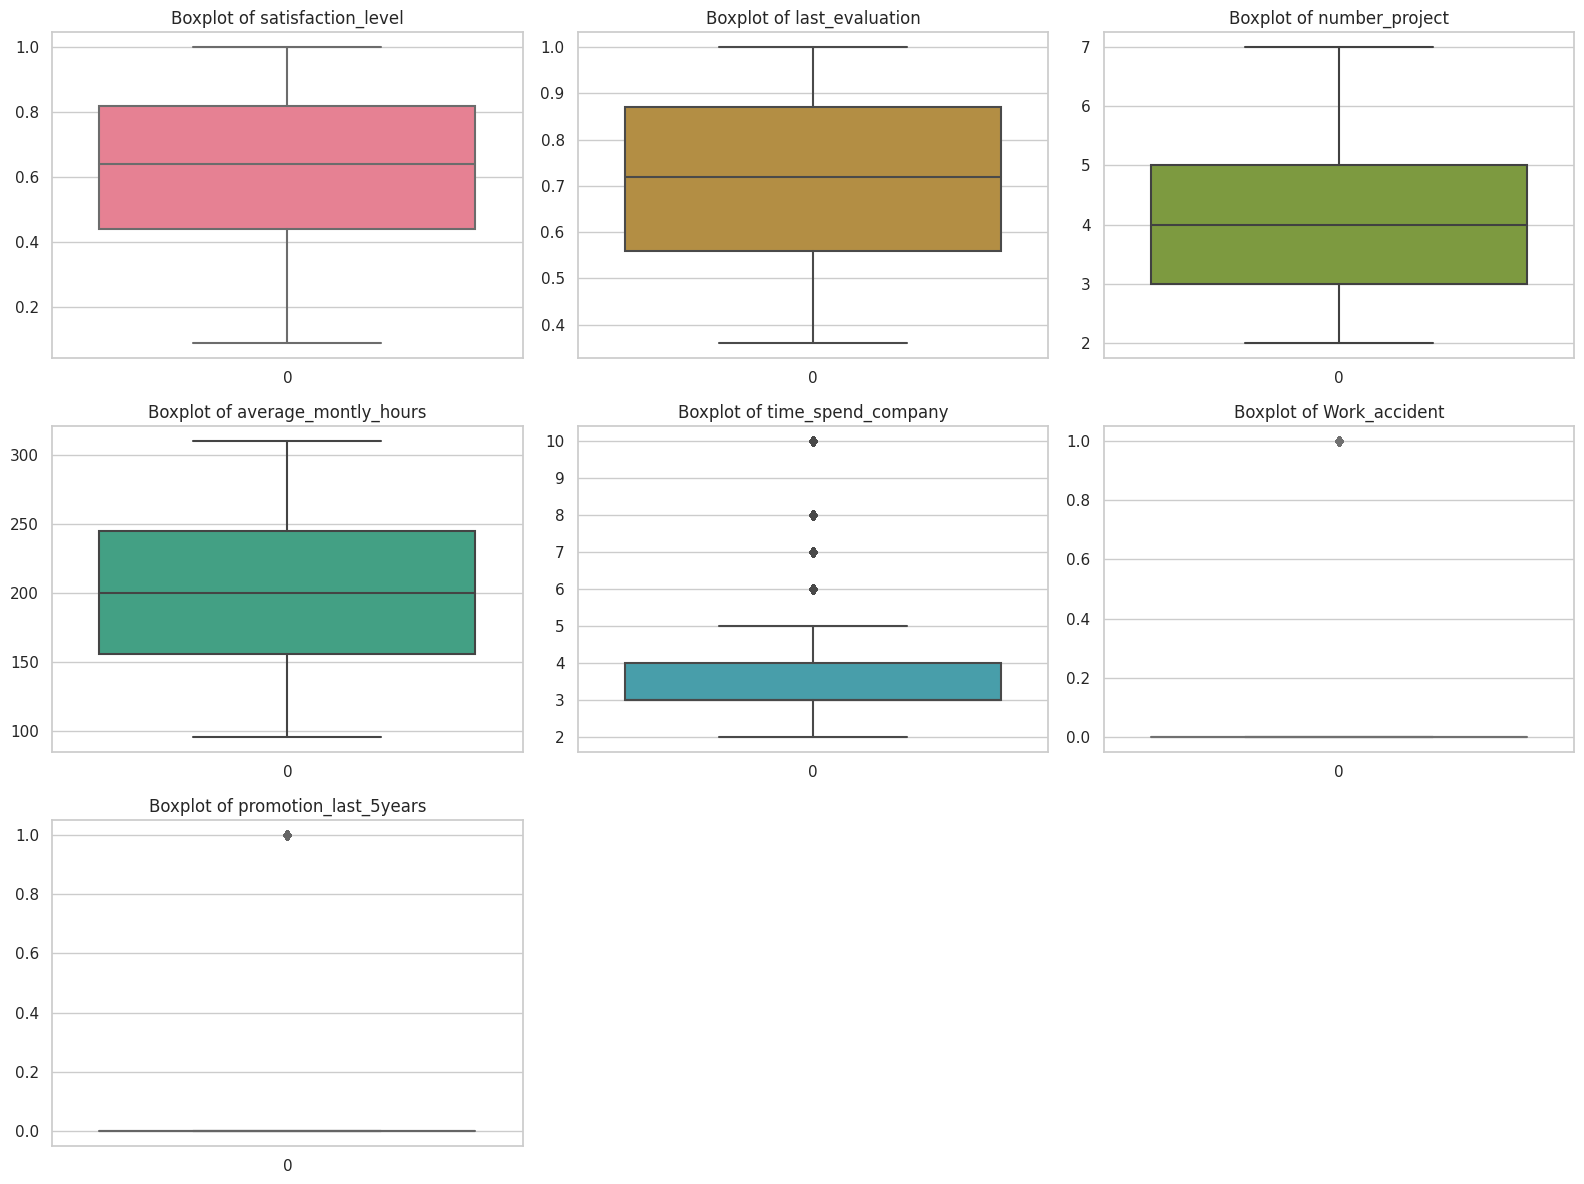

In [9]:
numerical_cols = df.select_dtypes(include=['float64']).columns

# Set the style for seaborn
sns.set(style="whitegrid")

# Define a color palette with a list of distinct colors
colors = sns.color_palette("husl", len(numerical_cols))

# Create individual boxplots for each numerical column with different colors
plt.figure(figsize=(16, 12))
for i, (col, color) in enumerate(zip(numerical_cols, colors), 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df[col], palette=[color])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

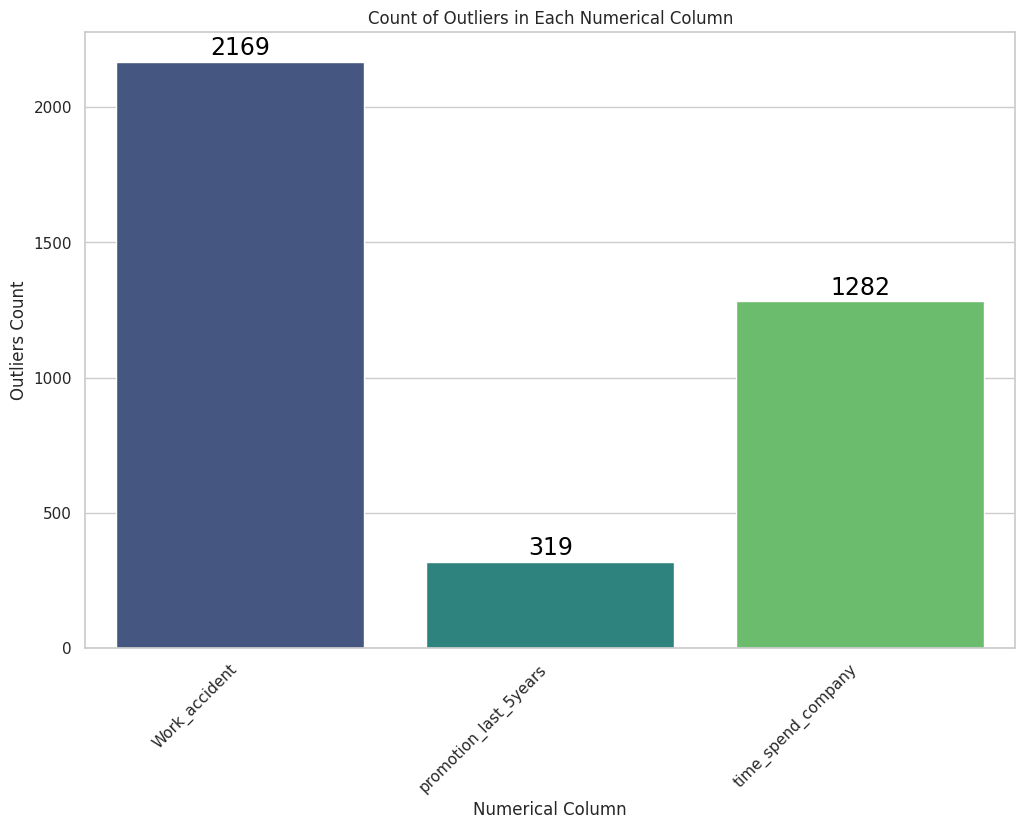

In [10]:
# Function to identify outliers based on IQR
def find_outliers(column):
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].copy()
    outliers['Column'] = column
    return outliers

# Identify outliers for each numerical column
all_outliers = pd.concat([find_outliers(col) for col in numerical_cols])

# Count the number of outliers for each numerical column
outliers_count = all_outliers.groupby('Column').size().reset_index(name='OutliersCount')

# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots for count of outliers
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Column', y='OutliersCount', data=outliers_count, palette='viridis')
plt.title('Count of Outliers in Each Numerical Column')
plt.xlabel('Numerical Column')
plt.ylabel('Outliers Count')
plt.xticks(rotation=45, ha='right')

# Add annotations with the number of outliers on each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=17, color='black')

plt.show()

<p>Apparently, there are 3 columns having outliers<p>

<h2>Optional</h2>
<p><strong>Cleaning Outliers</strong></p>
<p>If there is a need to address outliers in the dataset, the Interquartile Range (IQR) method can be employed. This method involves identifying data points that fall outside the range defined by the first quartile (Q1) subtracted by 1.5 times the IQR and the third quartile (Q3) added to 1.5 times the IQR. These identified outliers are then considered for removal or adjustment. The process begins by calculating the IQR for each numerical column, determining the lower and upper bounds, and subsequently identifying outliers beyond these bounds. Once outliers are identified, they can be visually represented, and their count per numerical column can be quantified. The resulting insights provide a comprehensive understanding of the distribution and impact of outliers in the dataset.</p>


In [11]:
columns_have_outliers = ['Work_accident', 'promotion_last_5years', 'time_spend_company']

In [12]:
def remove_outliers_iqr(df, column):
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [13]:
# Apply the remove_outliers_iqr function to each numerical column
df_no_outliers = df.copy()
for col in columns_have_outliers:
    df_no_outliers = remove_outliers_iqr(df_no_outliers, col)

# Display the shape before and after removing outliers
print(f'Shape before removing outliers: {df.shape}')
print(f'Shape after removing outliers: {df_no_outliers.shape}')

Shape before removing outliers: (14999, 9)
Shape after removing outliers: (11592, 9)


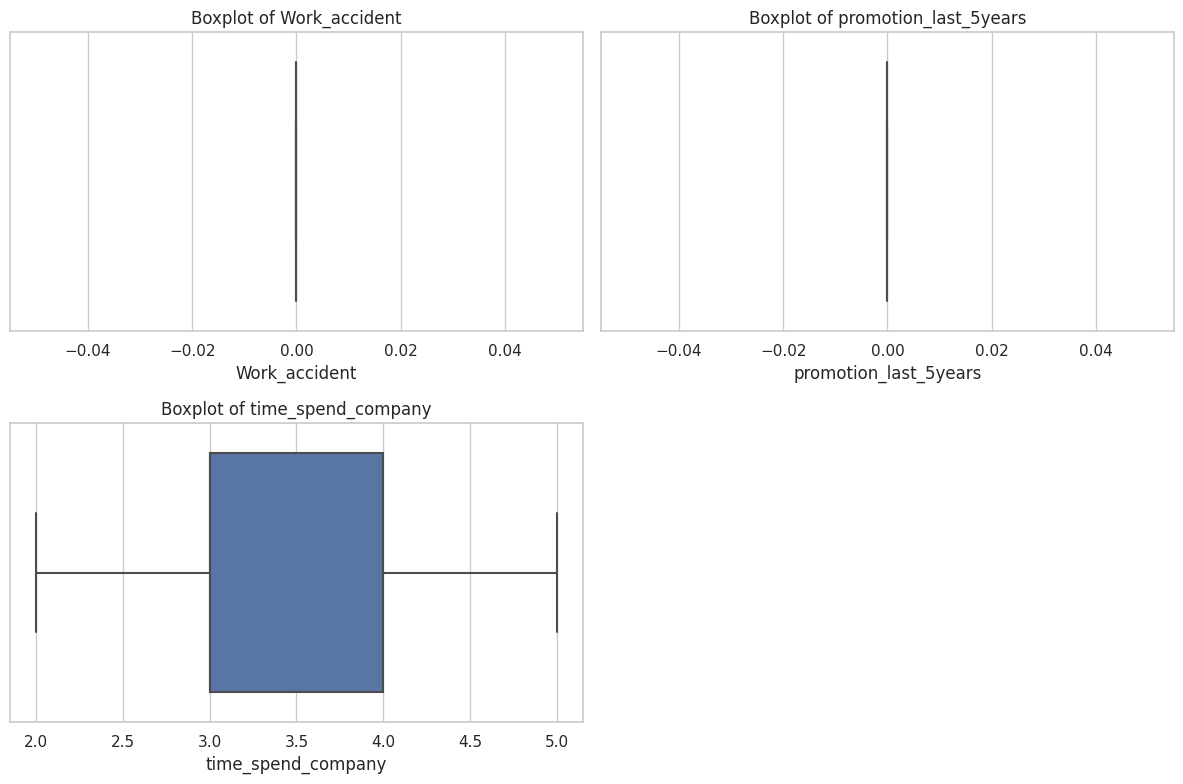

In [14]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_have_outliers, 1):
    plt.subplot(2, 2, i)
    
    # Create a boxplot
    sns.boxplot(x=df_no_outliers[col])
    
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## 3. Use the appropriate diagram to demonstrate the categorical variable in the data.

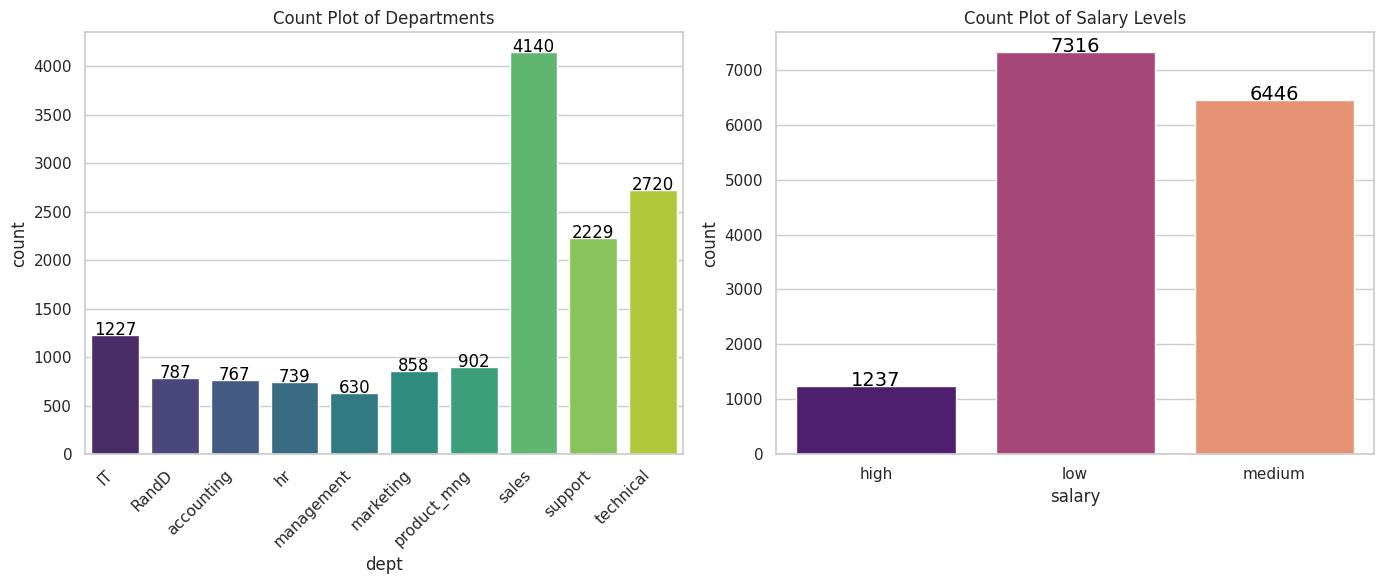

In [15]:
sns.set(style="whitegrid")

# Create count plots for 'dept' and 'salary'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='dept', data=df, palette='viridis')
plt.title('Count Plot of Departments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Annotate each bar with the count number
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=12, color='black')

plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='salary', data=df, palette='magma')
plt.title('Count Plot of Salary Levels')

# Annotate each bar with the count number
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=14, color='black')

plt.tight_layout()
plt.show()

## 4. Explain to your manager what actually leads to differences in income (salary)

In [16]:
# Group by 'salary' and calculate summary statistics for each column
salary_summary = df.groupby('salary').agg({
    'satisfaction_level': 'mean',
    'last_evaluation': 'mean',
    'number_project': 'mean',
    'average_montly_hours': 'mean',
    'time_spend_company': 'mean',
    'Work_accident': 'mean',
    'promotion_last_5years': 'mean',
}).reset_index()

# Exclude 'dept' column from the table
visible_columns = ['salary', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']

# Create a table figure using plotly graph_objects
fig = go.Figure(data=[go.Table(
    header=dict(values=list(salary_summary[visible_columns].columns)),
    cells=dict(values=[salary_summary[visible_columns][col].round(3) if col != 'salary' else salary_summary[visible_columns][col] for col in salary_summary[visible_columns].columns])
)])

# Update layout for better visibility
fig.update_layout(
    title='Salary Summary',
    height=300
)

# Show the figure
fig.show()


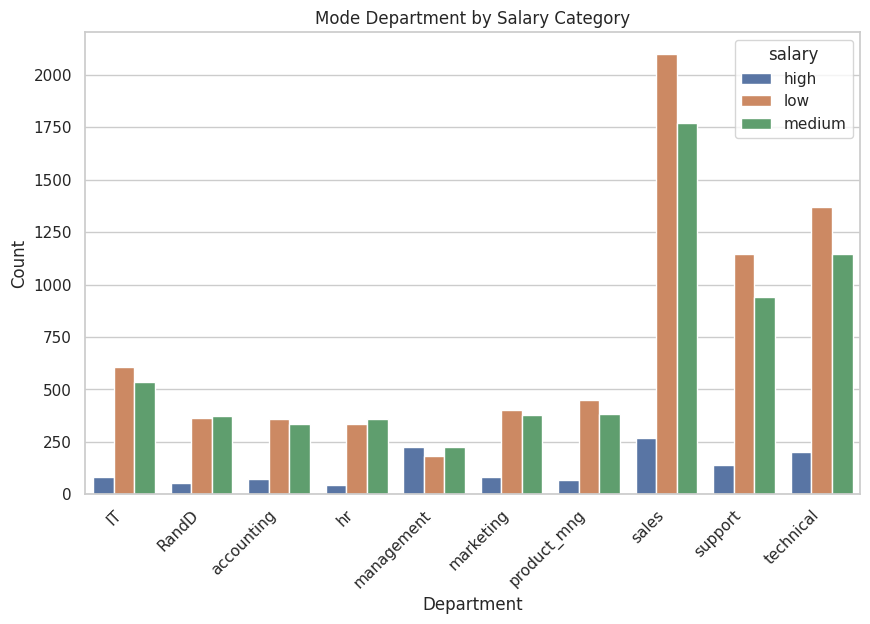

In [17]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot for the mode of 'dept' column
plt.figure(figsize=(10, 6))
sns.countplot(x='dept', hue='salary', data=df)
plt.xticks(rotation=45, ha='right') 
plt.title('Mode Department by Salary Category')
plt.xlabel('Department')
plt.ylabel('Count')

# Show the plot
plt.show()

## 5.  Determine the relationship among the variables.

In [18]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
df_label_encoded = df.copy()
label_encoder = LabelEncoder()
df_label_encoded['salary'] = label_encoder.fit_transform(df['salary'])
df_label_encoded['dept'] = label_encoder.fit_transform(df['dept'])

# Display the first few rows of the encoded DataFrames
print("Label Encoded DataFrame:")
print(df_label_encoded.head())


Label Encoded DataFrame:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53             2.0                 157.0   
1                0.80             0.86             5.0                 262.0   
2                0.11             0.88             7.0                 272.0   
3                0.72             0.87             5.0                 223.0   
4                0.37             0.52             2.0                 159.0   

   time_spend_company  Work_accident  promotion_last_5years  dept  salary  
0                 3.0            0.0                    0.0     7       1  
1                 6.0            0.0                    0.0     7       2  
2                 4.0            0.0                    0.0     7       2  
3                 5.0            0.0                    0.0     7       1  
4                 3.0            0.0                    0.0     7       1  


In [19]:
df_label_encoded.salary.unique()

array([1, 2, 0])

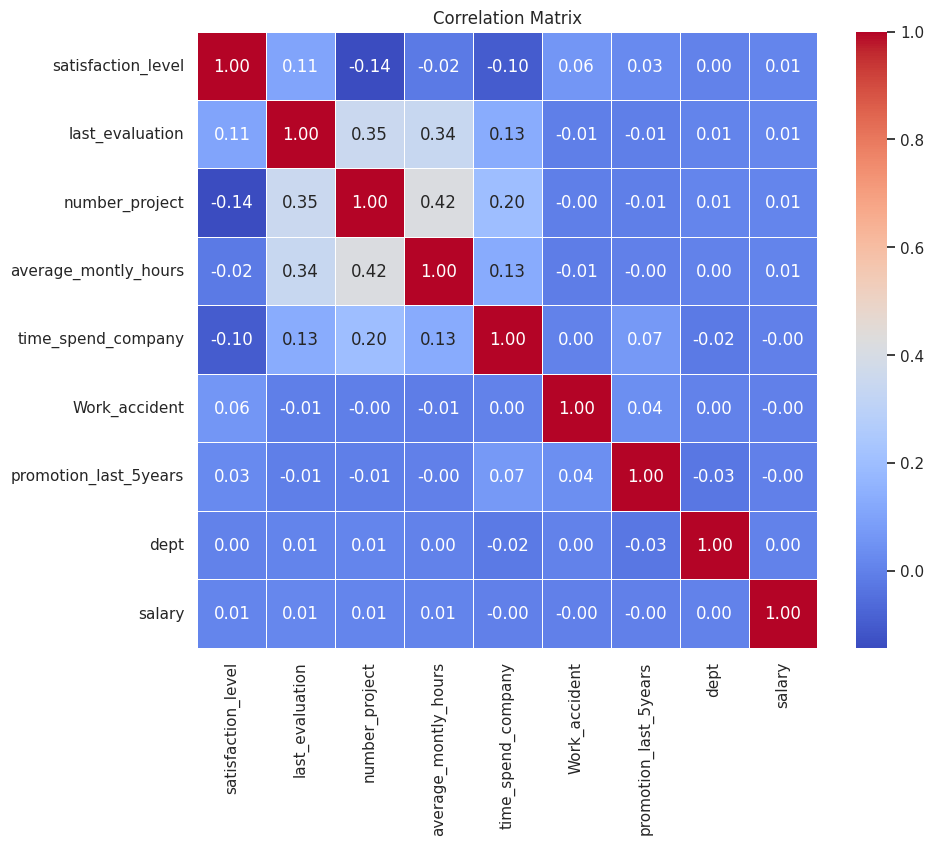

In [20]:
correlation_matrix = df_label_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

### Explanation Corelation
* Perfect Positive Correlation (1): If the correlation coefficient is 1, it indicates a perfect positive correlation. This means that as one variable increases, the other variable also increases proportionally. 
* Strong Positive Correlation (0.7 to 0.99): Values between 0.7 and 0.99 indicate a strong positive correlation. It suggests that there is a high chance that as one variable increases, the other variable tends to increase.

* Moderate Positive Correlation (0.3 to 0.69): Values between 0.3 and 0.69 suggest a moderate positive correlation. It implies that there is a tendency for the two variables to increase together, but the relationship is not as strong as in the previous case.
 
* No or Weak Correlation (-0.29 to 0.29): Values between -0.29 and 0.29 suggest a weak or no correlation. The variables are not strongly related.
 
* Moderate Negative Correlation (-0.3 to -0.69): Values between -0.3 and -0.69 indicate a moderate negative correlation. It suggests that there is a tendency for one variable to decrease as the other variable increases.
 
* Strong Negative Correlation (-0.7 to -0.99): Values between -0.7 and -0.99 indicate a strong negative correlation. It implies that as one variable increases, the other variable tends to decrease proportionally.
 
* Perfect Negative Correlation (-1): If the correlation coefficient is -1, it indicates a perfect negative correlation. This means that as one variable increases, the other variable decreases proportionally.

<h1>predicting satisfiction_level using XGBRegressor</h1> 

In [21]:
# Define features (X) and target variable (y)
X = df_label_encoded.drop(columns=['satisfaction_level'])  # Exclude the outcome variable
y = df_label_encoded['satisfaction_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor(n_estimators=2000, learning_rate=0.005, n_jobs=100)

In [22]:
model.fit(X_train, 
          y_train, 
          eval_set=[(X_test, y_test)],
          verbose=False)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [23]:
#Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae

0.13701077441364526

In [24]:
r2_score(y_test,y_pred)

0.45277180345428525